In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import scipy.stats as sps
import mplcyberpunk

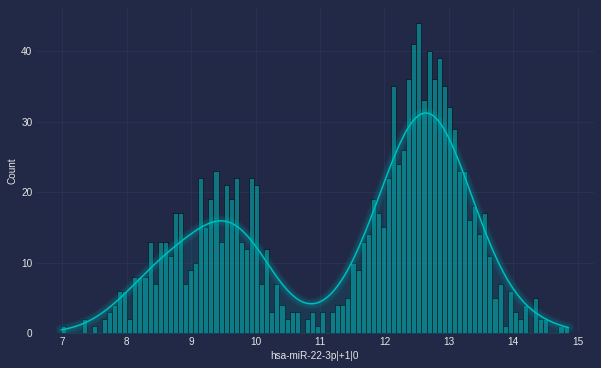

In [59]:
df = pd.read_csv('isomiR_CPM.tsv', sep = '\t')
mir22 = df.loc["hsa-miR-22-3p|+1|0"]

plt.style.use("cyberpunk")
plt.figure(figsize = (10, 6))
sns.histplot(mir22, kde = True, color = 'c', bins = 100)
mplcyberpunk.add_glow_effects()
plt.show()

#### создаю аннотацию, делая порог на разделение групп по 11

In [4]:
cond = mir22 < 11
left, right = mir22[cond], mir22[~cond]
left_sample, right_sample = df[left.index], df[right.index]
left_sample.to_csv('first_sample.tsv', sep = '\t')
right_sample.to_csv('second_sample.tsv', sep = '\t')

In [5]:
row = []
for i in df.columns:
    if i in left:
        row.append('left')
    else:
        row.append('right')
ann = pd.DataFrame(row, index = df.columns, columns = ['Tissue'])
ann.to_csv('annotation.tsv', sep = '\t')

#### тут уже deseq пробежал

In [24]:
data  = pd.read_csv('gene_deseq2_R.tsv', sep = '\t').dropna()

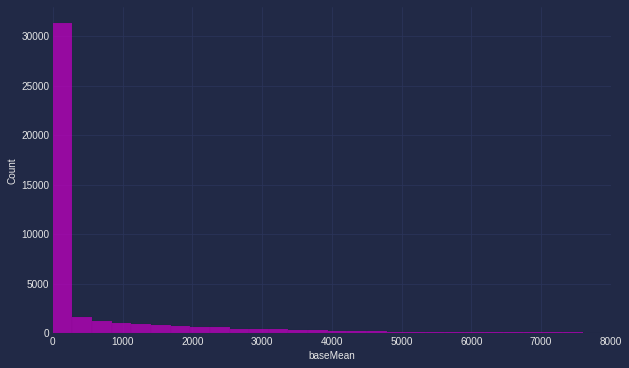

In [62]:
plt.figure(figsize = (10, 6))
sns.histplot(data = data, x = 'baseMean', color = 'm', bins = 2000)
plt.xlim([0, 8000])
plt.show()

In [51]:
cond1 = data['baseMean'] > 1000 # np.percentile(counts, 90)
cond2 = data['padj'] < 0.05
itog = data.loc[cond1 & cond2]

In [52]:
itog

,baseMean,log2FoldChange,lfcSE,pvalue,padj
RN7SK,2362.521775,1.055892,0.140057,3.061214e-160,1.360097e-155
SNRNP70,9681.667361,0.851510,0.037237,6.674957e-116,4.236691e-112
CCDC130,1348.485219,0.800024,0.036309,3.456218e-108,1.706220e-104
CLASRP,1805.160057,0.805866,0.037690,1.257907e-102,5.588879e-99
MIB2,1226.666518,0.976820,0.046771,1.362459e-97,4.035603e-94
...,...,...,...,...,...
OLFML2A,2944.560251,-0.114391,0.052551,3.104087e-02,4.938042e-02
PDCD6,6163.306408,0.065585,0.030175,3.106764e-02,4.941947e-02
SLC25A13,1694.986547,-0.082512,0.038333,3.123605e-02,4.965714e-02
CD163,3105.162083,-0.164207,0.076809,3.124216e-02,4.966508e-02


In [55]:
itog.shape[0]

7219

In [56]:
data.shape[0]

44430